AS A PART OF SMART CITY INNOVATION WE CREATED AN TRAFFIC PREDICTION SYSTEM WHICH PREDICTS THE TRAFFIC IN CERTAIN JUNCTIONS AT TIME AND DATE.WE CREATED RANDOM FOREST AND NEURAL NETWORK MODELS FOR THIS TASK.WE FUTHER WANTED TO INTEGRATE IT IN WEBSITE.BUT STOPPED DUE TO TIME CONSTRAINS

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [ ]:
print(df['DateTime'].dtype)

In [ ]:
df['DateTime'] = pd.to_datetime(df['DateTime'])

In [ ]:
df['Hour'] = df['DateTime'].dt.hour
df['DayOfWeek'] = df['DateTime'].dt.dayofweek
df['Month'] = df['DateTime'].dt.month

In [ ]:
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df[['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month']])
df_normalized = pd.DataFrame(df_normalized, columns=['Junction', 'Vehicles', 'Hour', 'DayOfWeek', 'Month'])

X = df_normalized[['Junction', 'Hour', 'DayOfWeek', 'Month']]
y = df_normalized['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (38496, 4) (38496,)
Testing set shape: (9624, 4) (9624,)


In [ ]:
Q1 = df['Vehicles'].quantile(0.25)
Q3 = df['Vehicles'].quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outlier_mask = (df['Vehicles'] < (Q1 - threshold * IQR)) | (df['Vehicles'] > (Q3 + threshold * IQR))
df_cleaned = df[~outlier_mask]

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df_cleaned[['Junction', 'Vehicles']])
df_normalized = pd.DataFrame(df_normalized, columns=['Junction', 'Vehicles'])

In [ ]:
X = df_normalized[['Junction']]
y = df_normalized['Vehicles']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)


Random Forest Mean Squared Error: 0.00017323358270989383
Random Forest R-squared: 0.9999995749356724


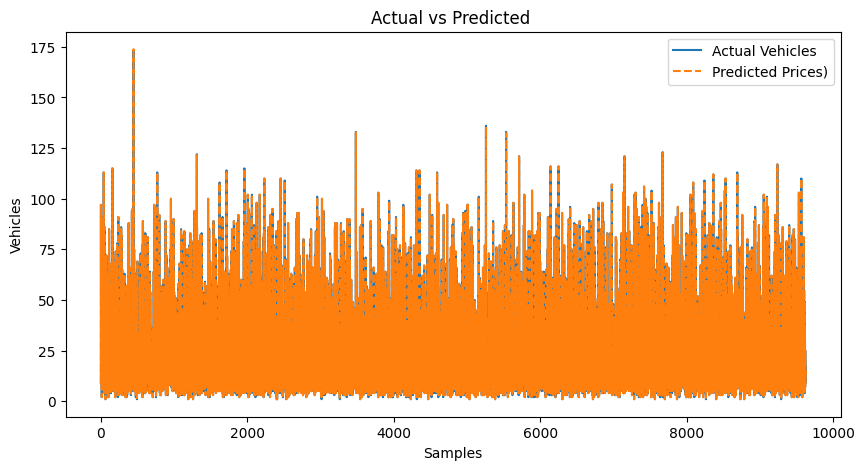

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset
data = pd.read_csv('/contents/drive/MyDrive/vechicle.csv')

# Drop ID column if present
data.drop('ID', axis=1, inplace=True)

# Convert DateTime to datetime format and set as index
data['DateTime'] = pd.to_datetime(data['DateTime'])
data.set_index('DateTime', inplace=True)

# Encode Junction column
encoder = LabelEncoder()
data['Junction'] = encoder.fit_transform(data['Junction'])

# Select features and target variable
features = data[['Junction', 'Vehicles']]  # Adjust columns as per your dataset
target = data['Vehicles']  # Assuming Vehicles is the target variable

# Handle missing values if any
# For example, impute missing values using mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Example of what you can do next (not necessary for preprocessing):
# Train your model, save it, and use it for predictions
# This assumes you have already defined and trained your model


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import joblib

# Initialize the Random Forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Save the trained model and features
joblib.dump(model_rf, '/content/drive/My Drive/ld_model_rf.pkl')
joblib.dump(features.columns, '/content/drive/My Drive/ld_features_rf.pkl')

# Make predictions
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Vehicles')
plt.plot(y_pred_rf, label='Predicted Prices)', linestyle='dashed')
plt.legend()
plt.title('Actual vs Predicted ')
plt.xlabel('Samples')
plt.ylabel('Vehicles')
plt.show()

Neural Network

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6465 (25.25 KB)
Trainable params: 6465 (25.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2, verbose=1)

# Prediction of values
y_pred = model.predict(X_test)
y_pred = y_pred.squeeze()

# Calculation of metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Epoch 1/25
963/963 [==============================] - 5s 3ms/step - loss: 5.8930 - mae: 0.3302 - val_loss: 1.3709e-05 - val_mae: 0.0027
Epoch 2/25
963/963 [==============================] - 2s 3ms/step - loss: 3.3868e-05 - mae: 0.0030 - val_loss: 2.9295e-06 - val_mae: 0.0013
Epoch 3/25
963/963 [==============================] - 3s 3ms/step - loss: 1.4721e-05 - mae: 0.0018 - val_loss: 4.0010e-07 - val_mae: 4.4736e-04
Epoch 4/25
963/963 [==============================] - 2s 2ms/step - loss: 7.2223e-05 - mae: 0.0032 - val_loss: 0.0030 - val_mae: 0.0413
Epoch 5/25
963/963 [==============================] - 2s 2ms/step - loss: 8.4252e-04 - mae: 0.0075 - val_loss: 1.9538e-07 - val_mae: 3.3506e-04
Epoch 6/25
963/963 [==============================] - 2s 2ms/step - loss: 0.0910 - mae: 0.0588 - val_loss: 1.7100e-04 - val_mae: 0.0101
Epoch 7/25
963/963 [==============================] - 2s 2ms/step - loss: 1.5574e-04 - mae: 0.0091 - val_loss: 5.1566e-05 - val_mae: 0.0056
Epoch 8/25
963/963 [====

#### These metrics indicate that the model has sufficient accuracy in predicting values, but can be improved.

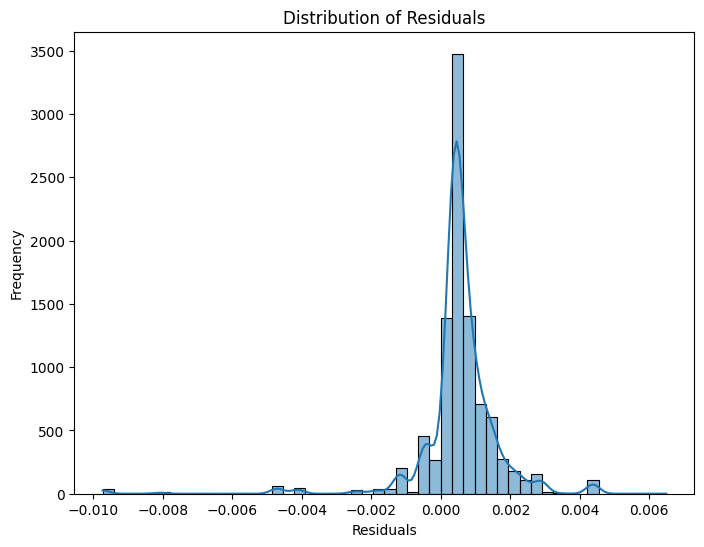

In [ ]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()